In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('Practical-example.Descriptive-statistics-exercise-solution.xlsx')
data

,Unnamed: 0,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,NaN,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,NaN,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,NaN,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,NaN,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,NaN,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,5044,5,NaN,NaN,Apartment,44,1238.5836,322610.7392,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,NaN,5047,5,NaN,NaN,Apartment,47,794.5184,279191.2560,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,5048,5,NaN,NaN,Apartment,48,1013.2692,287996.5296,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,5050,5,NaN,NaN,Apartment,50,1074.7088,365868.7776,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task # 01

Variable	Type of data	Level of measurement	Comment
1. Cust ID	Categorical	Nominal	This variable has the same properties as ID.
2. Mortgage	Categorical	Nominal	This is a Binary variable. Like a Yes/No question or Gender.
3. Year of sale	Numerical, discrete	Interval	Year is a numerical variable. It is always discrete. The level of measurement is questionable, but we would treat it as interval, as the 0 year would be the time when the Big Bang happened. The current BC-AD calendar was arbitrary chosen (similarly to degrees Celsius and Fahrenheit).


# Task # 02
 Create a frequency distribution graph (that is a histogram with the highest possible number of bins - 272). Use data on all apartments, no matter if sold or not.

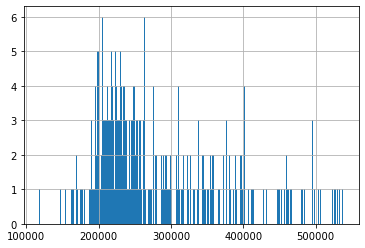

In [7]:
data['Price'].hist(bins = 272)